# Task 1

### Import Files

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cv2
import numpy as np


### Defining Paths And Reading Them Into A Numpy Array

In [2]:
paths=[
    'R20m/T43SCT_20231116T055109_B01_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B02_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B03_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B04_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B05_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B06_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B07_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B8A_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B11_20m.jp2'
    ,'R20m/T43SCT_20231116T055109_B12_20m.jp2'
]

#concatinate
bands_data=[rasterio.open(i) for i in paths]

bands=[]
for i in bands_data:
    bands.append(i.read(1))
bands=np.asarray(bands)
bands.shape



(10, 5490, 5490)

### Visualizaing The Bands

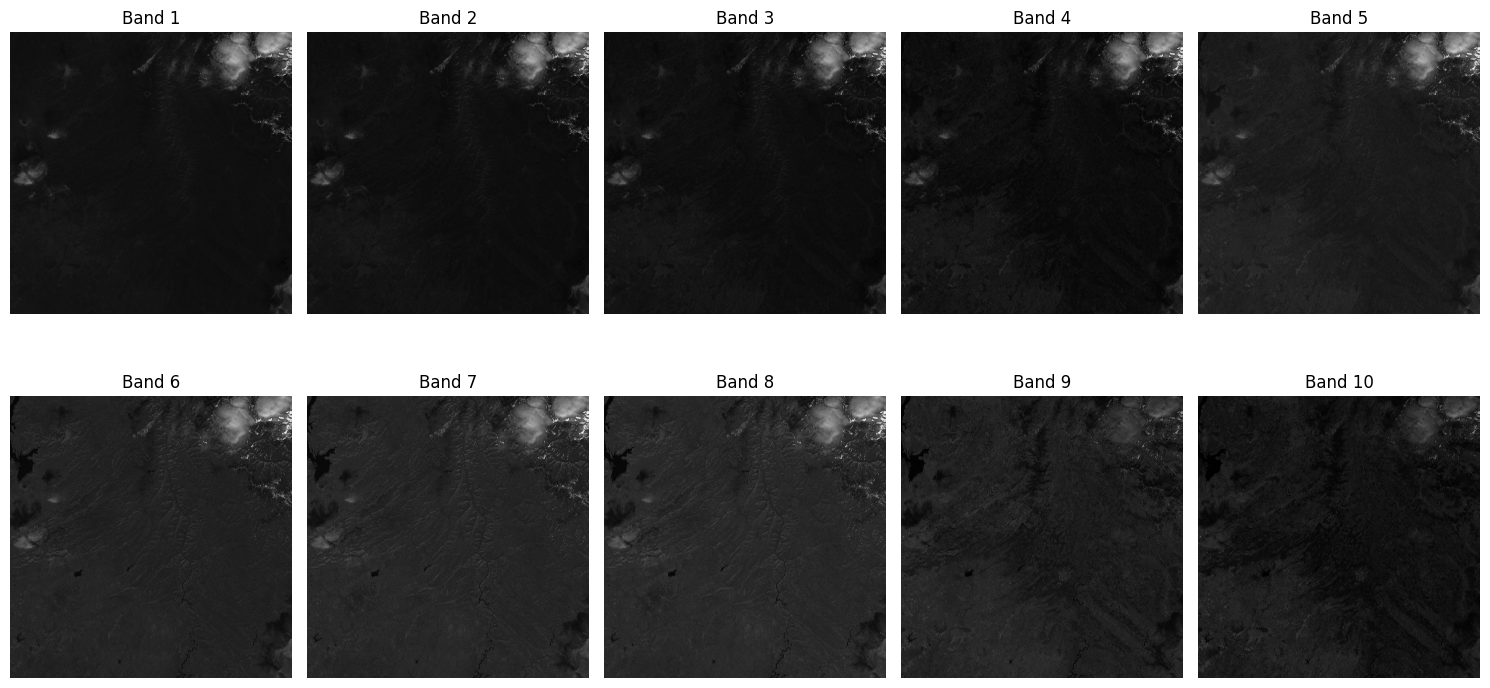

In [3]:
fig = plt.figure(figsize=(15, 8))  
i=1
for band in bands:
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(band, cmap="gray")
    ax.set_title(f'Band {i}')
    ax.axis('off')
    i+=1

plt.tight_layout()  
plt.show()

### Cropping The Data From Index (0, 0) To (500, 500)

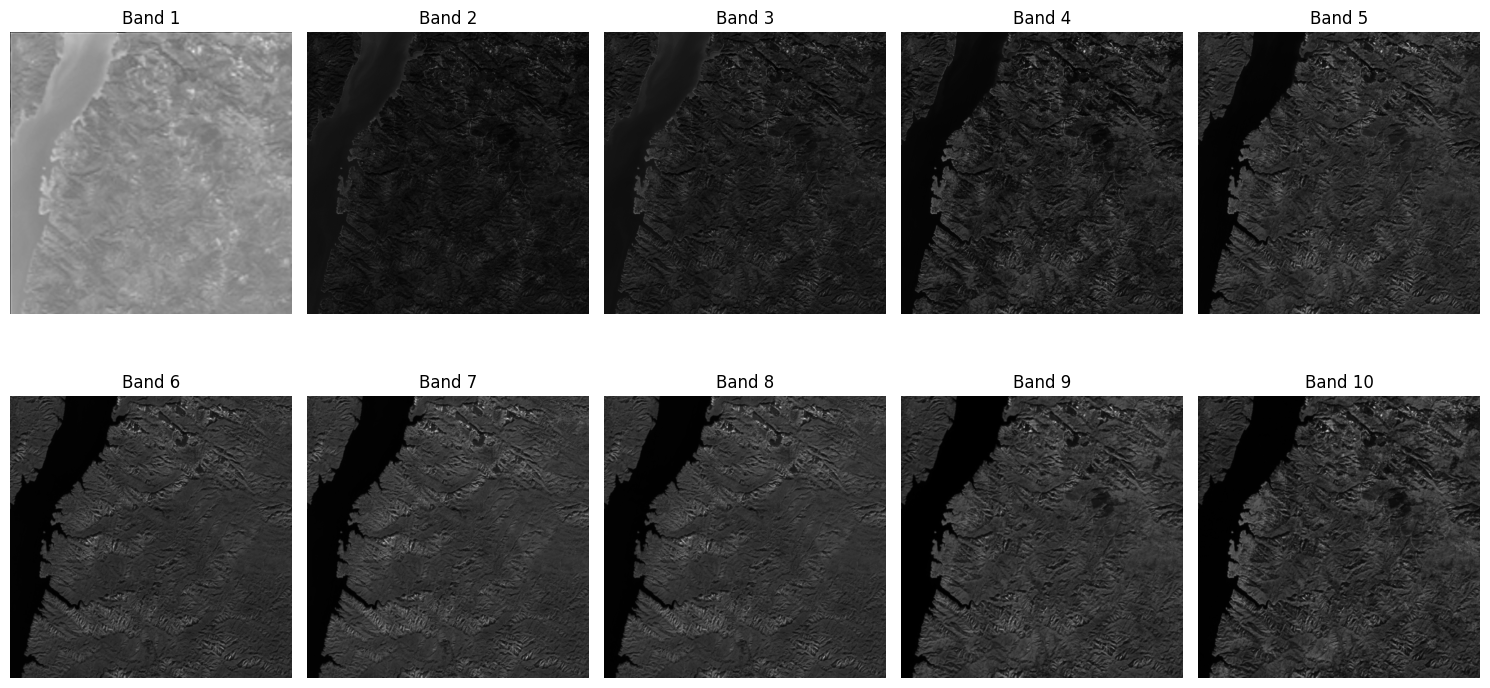

In [4]:
x_start, x_end = 0, 500 
y_start, y_end = 0, 500 

cropped_bands = []

for band in bands:
    temp = band[y_start:y_end, x_start:x_end]
    cropped_bands.append(temp)

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

#visualising the cropped bands
i = 0
for band in cropped_bands:
    ax = axes.flatten()[i]
    ax.imshow(band, cmap='gray')
    ax.set_title(f'Band {i+1}')
    ax.axis('off') 
    i+=1

plt.tight_layout()  
plt.show()

### Superimposing 2 Bands Onto Eachother Where Alpha Is The Intensity Of An Image

In [5]:
numpy_bands_data = []

for i in range(len(bands_data)):
    numpy_bands_data.append(np.array(bands_data[i].read(1), dtype=np.uint8))
    
index1=int(input("Enter Band 1 : "))-1
index2=int(input("Enter Band 2 : "))-1
alpha1=float(input("Enter Alpha 1 : "))
alpha2=float(input("Enter Alpha 2 : "))

img1=numpy_bands_data[index1]
img2=numpy_bands_data[index2]

temp=cv2.addWeighted(img1, alpha1, img2, alpha2, 0)
cv2.imshow("Superimposed Image", temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/raja/.local/lib/python3.10/site-packages/cv2/qt/plugins"


# Task 2

In [6]:
#Run the next line for running PCA on cropped data
# bands = np.asarray(cropped_bands)
matrix=bands.transpose(1, 2, 0)
matrix.shape

(5490, 5490, 10)

### Defining PCA And Reconstruction Function

In [7]:
import numpy as np
import cv2

# Set the environment variable to prioritize X11 over Wayland
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)
cv2.setNumThreads(0)

# Rest of your code
def pca1(matrix, n):
    # calculating mean, standard deviation, and the normalized matrix
    mean = np.mean(matrix)
    standard_deviation = np.std(matrix)
    normalized_matrix = (matrix - mean) / standard_deviation

    con_matrix = np.concatenate(normalized_matrix)
    # covariance_matrix = np.cov(matrix)
    eigenvalues, eigenvectors = np.linalg.eigh(np.cov(con_matrix, rowvar=False))

    # sorting eigenvalues and vectors in descending
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # calculating the principal components
    components = eigenvectors[:, :n]
    principal_components = np.dot(con_matrix, components)
    return principal_components, components, mean, normalized_matrix

def inverse_transform(principal_components, components, mean):
    # calculating the inverse transformation of the matrix to return reconstructed data from the principal components
    reconstructed_data = np.dot(principal_components, components.T) + mean
    return reconstructed_data


### Calculating the Principal Components, Top N Eigen Vectors, And The Mean

In [8]:

principal_components, components, mean, normalized_matrix = pca1(matrix= matrix, n=3)
    

: 

### Reshaping The Data

In [ ]:
x, y = bands[0].shape
principal_components_reshaped= np.reshape(principal_components, ((3), x, y))
principal_components_reshaped.shape

### Visualizing the Principal Components

In [ ]:
fig = plt.figure(figsize=(15, 8))  
i=1
for principal_component in principal_components_reshaped:
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(principal_component, cmap="gray")
    ax.set_title(f'Principal Component {i}')
    ax.axis('off')
    i+=1

plt.tight_layout()  
plt.show()

### Computing The Reconstructed Data

#### Transformed Data = ( Original Data × Principal Components ) + Mean

In [ ]:
reconstructed_data = inverse_transform(principal_components=principal_components, components=components, mean=mean)
reconstructed_data = np.reshape(reconstructed_data, (10, x, y))
reconstructed_data.shape

### Visualizing The Reconstructed Data

In [ ]:
fig = plt.figure(figsize=(15, 8))  
i=1
for j, reconst in enumerate(reconstructed_data):
    ax = fig.add_subplot(2, 5, j+1)
    ax.imshow(reconst, cmap="gray")
    ax.set_title(f'Reconstructed Image {j+1}')
    ax.axis('off')
    i+=1

plt.tight_layout()  
plt.show()

# Task 3

### Caclulating MSE

#### MSE = ∑ (Normalized Matrix - Reconsructed Matrix) ^ 2 / Size

In [ ]:
def mse (matrix, reconstructed_data):    
    #calculating the mean squared error 
    normalized_matrix_transpose = matrix.T
    squared_diff = np.sum(np.square(normalized_matrix_transpose - reconstructed_data))
    mean_squared_difference = squared_diff/matrix.size
    return mean_squared_difference
    

### Calculating Explained Variance

#### Explained Variance = var(Reconstructed Matrix) / var(Normalized Matrix)

In [ ]:
def explained_variance(matrix, reconstructed_data):
    #calculating the explained variance
    normalized_matrix_transpose = matrix.T
    total_variance = np.var(normalized_matrix_transpose)
    reconstructed_variance = np.var(reconstructed_data)
    explained_variance = reconstructed_variance / total_variance
    return explained_variance

In [ ]:
normalized_matrix_transpose = normalized_matrix.T

In [ ]:
mse(normalized_matrix, reconstructed_data)

### Calculating The Principal Components For All N values [1,5]

In [ ]:
#change n to change the number of PCAs for the graph
#calculating n number of PCAs for the original bands, reconstructing it, finding its variance and information loss, for all values of n
n=[1,2,3,4,5]
mse_arr = []
explained_variances= []
for i in n:
    principal_components, components, mean, normalized_matrix = pca(matrix= matrix, n=i)
    x, y = bands[0].shape
    principal_components_reshaped= np.reshape(principal_components, (i, x, y))
    
    reconstructed_data = inverse_transform(principal_components=principal_components, components=components, mean=mean)
    reconstructed_data = np.reshape(reconstructed_data, (10, x, y))
    
    mse_arr.append(mse(normalized_matrix, reconstructed_data))
    
    explained_variances.append(explained_variance(normalized_matrix, reconstructed_data))
    
    

In [ ]:
print(mse_arr)
print(explained_variances)
mse_arr=np.asarray(mse_arr)
explained_variances = np.asarray(explained_variances)
#calculating the informaation loss
information_loss = 1 - explained_variances
print(information_loss)

In [ ]:

#generate a list containing the number of components used in PCA
num_components = list(range(1, len(mse_arr) + 1))

#plotting the graphs
plt.figure(figsize=(8, 6))
plt.plot(num_components, mse_arr, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(num_components, explained_variances, marker='o', linestyle='-')
plt.title('Explained Variances vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variances')
plt.grid(True)
plt.show()

information_loss = 1 - explained_variances
plt.figure(figsize=(8, 6))
plt.plot(num_components, information_loss, marker='o', linestyle='-')
plt.title('Information Loss vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Information Loss')
plt.grid(True)
plt.show()
